In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Kiểm tra cấu hình Cuda**

In [2]:
!nvidia-smi

Mon Nov  9 16:18:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Di chuyển đên folder My Drive/darknet**

In [3]:
#Sau khi mount với drive. Chuyển đến thư mục chứa file darknet.zip vừa tải lên
#Ví dụ tôi để ở thư mục gốc của Google Drive
%cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
#Giải nén file darknet.zip, một lần thôi nhé !!!
!unzip darknet.zip

In [4]:
#Chuyển đến thư mục darknet
%cd darknet

/content/drive/My Drive/darknet


## Cấu hình YoLo !!!!!! đã cấu hình rồi 

In [ ]:
#Tạo thư mục backup để lưu lại weights khi huấn luyện
# #Tên thư mục phải trùng với link folder backup trong file obj.data trên
# !mkdir backup

In [ ]:
#Tạo file train.txt, valid.txt theo đoạn code
# import os
# import numpy as np
# #"obj" là tên thư mục chứa cả ảnh và file annotation.
# lst_files = os.listdir("data/obj/")
# lst_images = []

# for file in lst_files:
#   if ".txt" not in file:
#     lst_images.append(file)
    
# #Tách 200 ảnh ra làm tập validation  
# random_idx = np.random.randint(0, len(lst_images), 200)

# #Tạo file train.txt được đặt trong thư mục darknet/data
# with open("data/train.txt","w") as f:
#   for idx in range(len(lst_images)):
#     if idx not in random_idx:
#       f.write("data/obj/"+lst_images[idx]+"\n")
      
# #Tạo file valid.txt được đặt trong thư mục darknet/data
# with open("data/valid.txt","w") as f:
#     for idx in random_idx:
#       f.write("data/obj/"+lst_images[idx]+"\n")

# **Cấp quyền cho file darknet**

In [5]:
#Biên dịch darknet (chỉ cần biên dịch một lần, lần sau dùng bỏ qua bước này)
!make

chmod +x *.sh


In [6]:
#Phân quyền thực thi module darknet
!chmod +x ./darknet

# **Huấn luyện !!! đã huẩn luyện rồi**

In [ ]:
# Bắt đầu huấn luyện
# !./darknet detector train data/obj.data yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -map -dont_show > yolotinv4_lisenceplate.log

In [ ]:
# Danh sách các weights được lưu
!ls backup/

yolo-tinyv4-obj_1000.weights  yolo-tinyv4-obj_6000.weights
yolo-tinyv4-obj_2000.weights  yolo-tinyv4-obj_best.weights
yolo-tinyv4-obj_3000.weights  yolo-tinyv4-obj_final.weights
yolo-tinyv4-obj_4000.weights  yolo-tinyv4-obj_last.weights
yolo-tinyv4-obj_5000.weights


# **Sử dụng model đã được huẩn luyện để dự đoán ra kí tự**

In [119]:
from tensorflow.keras.models import load_model
# load model đã được huấn luyện sẵn
model = load_model('model_new_9.h5')

In [120]:
import pickle
# lấy ra tên mà kí tự đã được mã hóa
with open('name.pickle', 'rb') as f:
    name = pickle.load(f)
print(name)


import cv2
import numpy as np
# hàm dự đoán ra kí tự 
# đầu vào là một hình ảnh gray
def kq(arr):
  arr_1 = cv2.resize(arr, (224, 224), interpolation=cv2.INTER_CUBIC)
  arr_1 = np.array([arr_1]).reshape(-1,224 ,224, 1)
  a = model.predict_classes(arr_1)
  for i in name:
    if name[i] == a:
      return i

# **Dự đoán và tìm ra object **




In [243]:
# Dự đoán 
!./darknet detector test data/obj.data yolo-tinyv4-obj.cfg \backup/yolo-tinyv4-obj_best.weights data/4.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9

# Lấy tọa độ của biển số , lấy thủ công

In [244]:
# dựa vào kết quả phần trên rồi copy 
# left_x = Left
# top_y = Top
# wight = Right
# height = Bottom

left_x =  185   
top_y =  142   
width =  278   
height =  227

# Hiện thị bức ảnh 

In [245]:
# hàm để hiển thị kết quả dự đoán lên colab trực tiếp
def x2(image):
    original_width, original_height = image.shape[1], image.shape[0]
    resized_image = cv2.resize(image, (1 * original_width, 1 * original_height), interpolation=cv2.INTER_CUBIC)

    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.axis("off")
    plt.imshow(resized_image)
    plt.show()

  

In [246]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("predictions.jpg")

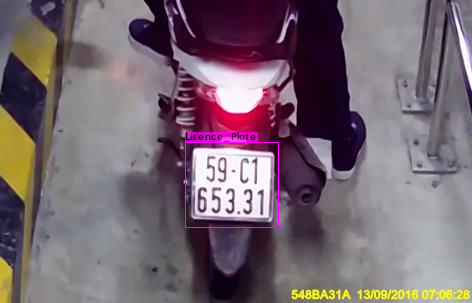

In [247]:
image

# Crop ảnh để lấy biển số 

In [248]:
image = image.crop((left_x, top_y, width, height))

# Lưu lại biển số

In [249]:
image.save('anh.jpg')

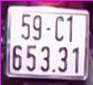

In [250]:
image

# chuyển biển số xe sang hệ mày gray

In [251]:
import cv2

anh = cv2.imread('anh.jpg')
gray = cv2.cvtColor(anh, cv2.COLOR_RGB2GRAY)

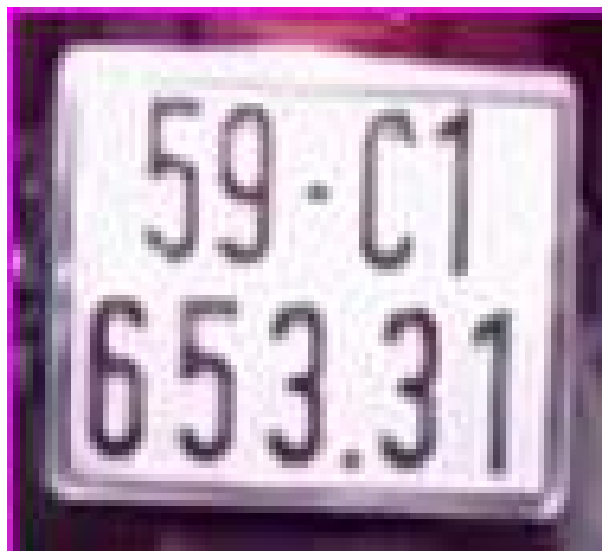

In [252]:
x2(anh)

# resize của bức ảnh

In [253]:
gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

# kĩ thuật làm smood ảnh

In [254]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# chuyển về hệ màu đen trắng

In [255]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

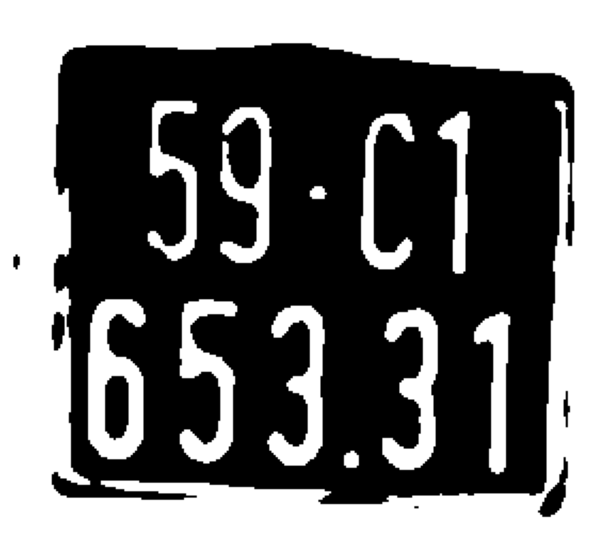

In [256]:
x2(thresh)

# làm nét ảnh 

In [257]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilation = cv2.dilate(thresh, rect_kern, iterations=1)

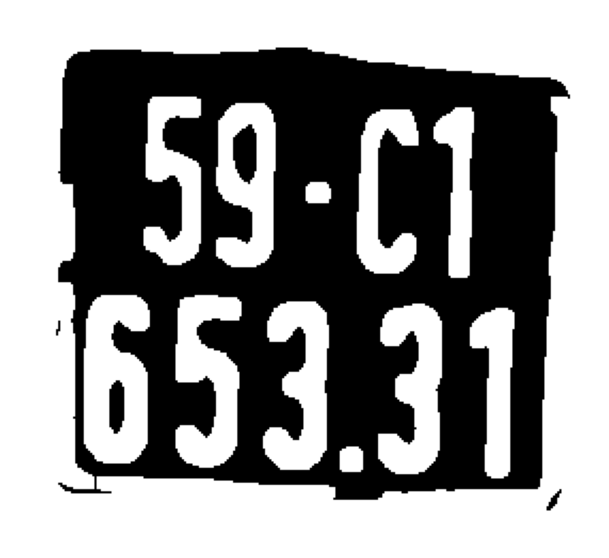

In [258]:
x2(dilation)

# xắp xếp các tọa độ từ trái qua phải và từ trên xuống dưới

In [259]:
try:
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except:
    ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# xắp xếp từ trái qua phải
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# tạo ảnh im2 bằng cách copy từ ảnh gray
im2 = gray.copy()

# xắp xếp theo thứ tự từ trái qua phải từ trên xuống dưới
X_ = []
Y_ = []
W_ = []
H_ = []

X_1 = []
Y_1 = []
W_1 = []
H_1 = []

# chia thành 2 phần sửa dụng y là tọa độ
for cnt in sorted_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # chia thành 2 phần là phần trên và phần dưới lấy tọa độ y là 100 để chia
    if y < 100:
        X_.append(x)
        Y_.append(y)
        W_.append(w)
        H_.append(h)
    else:
        X_1.append(x)
        Y_1.append(y)
        W_1.append(w)
        H_1.append(h)

swapped = True
while swapped:
    swapped = False
    for i in range(len(X_) - 1):
        if X_[i] > X_[i + 1]:
            X_[i], X_[i + 1] = X_[i + 1], X_[i]
            Y_[i], Y_[i + 1] = Y_[i + 1], Y_[i]
            W_[i], W_[i + 1] = W_[i + 1], W_[i]
            H_[i], H_[i + 1] = H_[i + 1], H_[i]

            swapped = True

swapped = True
while swapped:
    swapped = False
    for i in range(len(X_1) - 1):
        if X_1[i] > X_1[i + 1]:
            X_1[i], X_1[i + 1] = X_1[i + 1], X_1[i]
            Y_1[i], Y_1[i + 1] = Y_1[i + 1], Y_1[i]
            W_1[i], W_1[i + 1] = W_1[i + 1], W_1[i]
            H_1[i], H_1[i + 1] = H_1[i + 1], H_1[i]

            swapped = True

# gộp 2 phần vừa xắp xệp được ta sẽ được các tọa độ theo thứ tự trừ trái qua phải và từ trên xuống dưới
X_ = X_ + X_1
Y_ = Y_ + Y_1
W_ = W_ + W_1
H_ = H_ + H_1

# Thực hiện các luồng để bóc dữ liệu

5


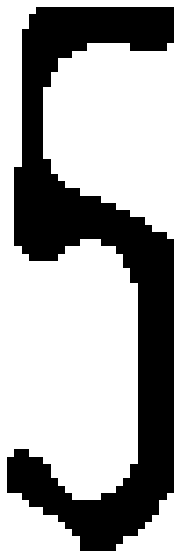

9


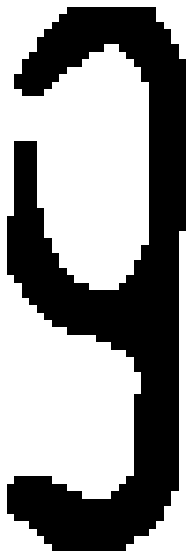

C


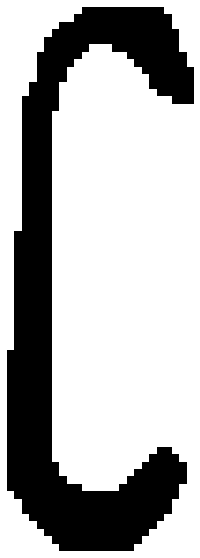

1


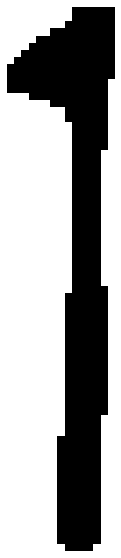

6


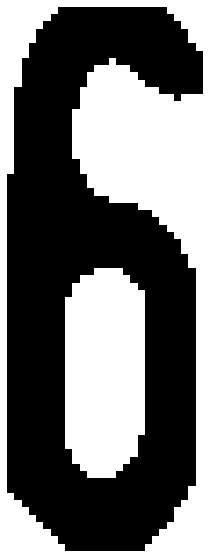

5


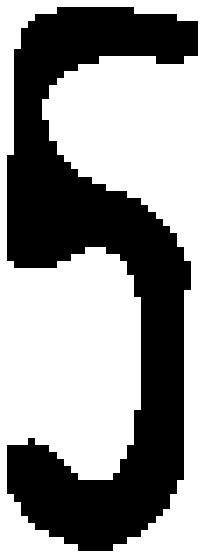

3


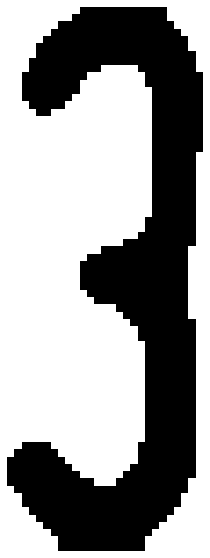

3


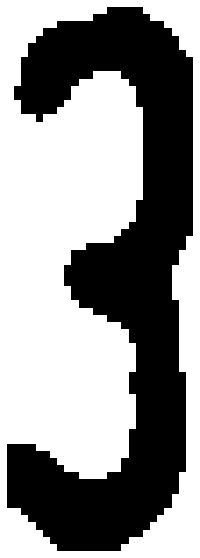

1


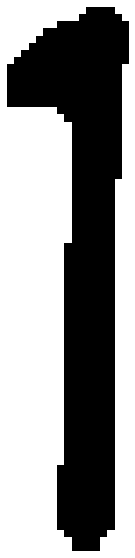

In [260]:
kq_ = []
for i in range(len(X_)):

  # Lấy ra các thông số về vị trí của các kí tự x, y, w, h
    x = X_[i]
    y = Y_[i]
    w = W_[i]
    h = H_[i]
    height, width = im2.shape

    # nếu chiều cao của box không đủ cao, thỉ loại bỏ
    if height / float(h) > 6:
        continue

    ratio = h / float(w)
    # nếu tỉ lệ chiều cao trên chiều rộng nhỏ hơn 1,5 thì bỏ qua, đây là quy định khi in chữ lên biển 
    if ratio < 1.5:
        continue

    # nếu chiều rộng không đủ rộng
    if width / float(w) > 15:
        continue

    area = h * w
    # nếu vùng được chọn nhỏ hơn 100 pixel, thì lại bỏ 
    if area < 100:
        continue

    # vẽ lên các khung bao quanh kí tự 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # crop ra khung hình chứ kí tự
    # roi = thresh[y - 5: y + h + 5, x - 5: x + w + 5]
    roi = thresh[y + 2 : y + h - 2 , x + 2  : x + w - 2]

    # đảo bit trắng thành đen, đen thành trắng
    roi = cv2.bitwise_not(roi)

    # thực hiện một số hiệu ứng làm mờ
    roi = cv2.medianBlur(roi, 5)
    kq_.append(kq(roi))
    print(kq(roi))
    x2(roi)

In [261]:
kq_

['5', '9', 'C', '1', '6', '5', '3', '3', '1']

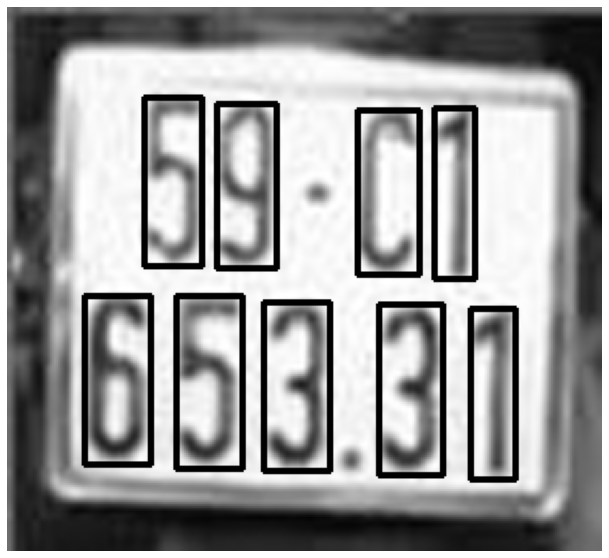

In [262]:
x2(im2)